<a href="https://colab.research.google.com/github/GiTGlebov/JobShopProblem/blob/main/JobShop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import sys
import json
import math
import matplotlib.pyplot as plt
%matplotlib inline

Argv = sys.argv
if( len(Argv) < 2 ):
    sys.stderr.write( "Usage: python %s <instance>\n" % Argv[0] )
    quit()

Target = Argv[1]

file = open('/content/JobShop/instances.json')
data = json.load( file )
for dat in data:
  Target = dat['name']
  instance = [ inst for inst in data if inst['name'] == Target ]
  # if( len(instance) == 0 ):
  #     raise Exception("There is no instance named %s" % Target)

  instance = instance[0]
  path = os.path.abspath( os.path.join(os.path.dirname( '/content/instances' ),"../%s" % instance['path']) )
  optimum = instance['optimum']

  if( optimum is None ):
      if( instance['bounds'] is None ):
          optimum = "nan"
      else:
          optimum = instance['bounds']['lower']

  sys.stdout.write('--instance %s --optimum %s' % (path,optimum))

--instance /instances/abz5 --optimum 1234--instance /instances/abz6 --optimum 943--instance /instances/abz7 --optimum 656--instance /instances/abz8 --optimum 645--instance /instances/abz9 --optimum 661--instance /instances/ft06 --optimum 55--instance /instances/ft10 --optimum 930--instance /instances/ft20 --optimum 1165--instance /instances/la01 --optimum 666--instance /instances/la02 --optimum 655--instance /instances/la03 --optimum 597--instance /instances/la04 --optimum 590--instance /instances/la05 --optimum 593--instance /instances/la06 --optimum 926--instance /instances/la07 --optimum 890--instance /instances/la08 --optimum 863--instance /instances/la09 --optimum 951--instance /instances/la10 --optimum 958--instance /instances/la11 --optimum 1222--instance /instances/la12 --optimum 1039--instance /instances/la13 --optimum 1150--instance /instances/la14 --optimum 1292--instance /instances/la15 --optimum 1207--instance /instances/la16 --optimum 945--instance /instances/la17 --optim

In [ ]:
def Test (datas):
  false_ans = []
  accuracy = {}
  for data in datas:
    our_opt = Alg(data)
    if our_opt != optimum:
      false_ans.append(data['name'])
      accuracy[data['name']] = data['optimum'] - our_opt
  right_ans = len(data) - len(false_ans)    

  print("Failed jobs: ", false_ans)
  print("Right Answers: ", right_ans)
  
  return accuracy


In [ ]:
data

[{'name': 'abz5',
  'jobs': 10,
  'machines': 10,
  'optimum': 1234,
  'path': 'instances/abz5'},
 {'name': 'abz6',
  'jobs': 10,
  'machines': 10,
  'optimum': 943,
  'path': 'instances/abz6'},
 {'name': 'abz7',
  'jobs': 20,
  'machines': 15,
  'optimum': 656,
  'path': 'instances/abz7'},
 {'name': 'abz8',
  'jobs': 20,
  'machines': 15,
  'optimum': None,
  'bounds': {'upper': 665, 'lower': 645},
  'path': 'instances/abz8'},
 {'name': 'abz9',
  'jobs': 20,
  'machines': 15,
  'optimum': None,
  'bounds': {'upper': 679, 'lower': 661},
  'path': 'instances/abz9'},
 {'name': 'ft06',
  'jobs': 6,
  'machines': 6,
  'optimum': 55,
  'path': 'instances/ft06'},
 {'name': 'ft10',
  'jobs': 10,
  'machines': 10,
  'optimum': 930,
  'path': 'instances/ft10'},
 {'name': 'ft20',
  'jobs': 20,
  'machines': 5,
  'optimum': 1165,
  'path': 'instances/ft20'},
 {'name': 'la01',
  'jobs': 10,
  'machines': 5,
  'optimum': 666,
  'path': 'instances/la01'},
 {'name': 'la02',
  'jobs': 10,
  'machines'

In [ ]:
import re

path = '/content/instances'
dict_instance = {}
for filename in os.listdir(path):
  n = f'{filename}'
  numbs = []
  with open(path + '/' + n) as f:
    # print(f.read())
    lines = f.readlines()
    # print(n)
    for line in lines:
      # print(line)
      line = line.rstrip()
      line = line.strip()
      line = re.sub("\s\s+" , " ", line)
      # print(line)
      if line[0].isdigit():
        # print(line.split(' '))
        # print(map(int,line.split(' ')))
        new_list = list(map(int,line.split(' ')))
        new_list = [(new_list[i],new_list[i+1]) for i in range(0,len(new_list)-1,2)]
        numbs.append(new_list)
      else:
        continue    
    dict_instance[n] = numbs
print((dict_instance['abz5']))    


[[(10, 10)], [(4, 88), (8, 68), (6, 94), (5, 99), (1, 67), (2, 89), (9, 77), (7, 99), (0, 86), (3, 92)], [(5, 72), (3, 50), (6, 69), (4, 75), (2, 94), (8, 66), (0, 92), (1, 82), (7, 94), (9, 63)], [(9, 83), (8, 61), (0, 83), (1, 65), (6, 64), (5, 85), (7, 78), (4, 85), (2, 55), (3, 77)], [(7, 94), (2, 68), (1, 61), (4, 99), (3, 54), (6, 75), (5, 66), (0, 76), (9, 63), (8, 67)], [(3, 69), (4, 88), (9, 82), (8, 95), (0, 99), (2, 67), (6, 95), (5, 68), (7, 67), (1, 86)], [(1, 99), (4, 81), (5, 64), (6, 66), (8, 80), (2, 80), (7, 69), (9, 62), (3, 79), (0, 88)], [(7, 50), (1, 86), (4, 97), (3, 96), (0, 95), (8, 97), (2, 66), (5, 99), (6, 52), (9, 71)], [(4, 98), (6, 73), (3, 82), (2, 51), (1, 71), (5, 94), (7, 85), (0, 62), (8, 95), (9, 79)], [(0, 94), (6, 71), (3, 81), (7, 85), (1, 66), (2, 90), (4, 76), (5, 58), (8, 93), (9, 97)], [(3, 50), (0, 59), (1, 82), (8, 67), (7, 56), (9, 96), (6, 58), (4, 81), (5, 59), (2, 96)]]


In [ ]:
import random
import numpy as np
import copy
from collections import Counter

def GenALg(name,dict):
  # n,m = dict[name][0][0]
  # machines_time_job = {}
  # for j in range(1,n+1):
  #   for i in range(0,m):
  #     # print(dict[name][j][i][0])
  #     if dict[name][j][i][0] not in machines_time_job.keys():
  #       machines_time_job[dict[name][j][i][0]] = [dict[name][j][i][1]]
  #       # print(machines_time_job)
  #     else:
  #       # print(dict[name][j][i][1])
  #       # print(machines_time_job[dict[name][j][i][0]])
  #       machines_time_job[dict[name][j][i][0]].append(dict[name][j][i][1])
  # # l = list(range(0, n))
  # # random.shuffle(l)
  # # machines.append(l)
  # # for i in range(m-1)
  # machines_time_job = sorted(machines_time_job.items(),key = lambda x:x[0])
  # # l = list(range(0, n))
  # # random.shuffle(l)
  # massiv_times = []
  # # print(machines_time_job)
  # for machine in machines_time_job:
  #   massiv_times.append(machine[1])
  # massiv_times = np.array(massiv_times)  
  # # print(massiv_times)


  num_jobs,num_machines = dict[name][0][0]
  num_genes = num_jobs * num_machines
  pt = []
  ms = []
  for u in range(1,len(dict[name])):
    a = []
    b = []
    for o in dict[name][u]:

      a.append(o[0])
      b.append(o[1])
    ms.append(a)
    pt.append(b) 
  pt = np.array(pt)
  ms = np.array(ms)     
  # for i in range(num_jobs-1):
  #   ms=np.vstack((ms, massive_seq)) 
  print(ms)
  print(pt)
#  Блок был о преобразовании матрицы работ и времени работ

# Вводим все начальные параметры для ГА
  population_size = int(input('Population size:') or 30)
  crossover_rate = float(input('Crossover rate:') or 0.8)
  mutation_rate = float(input('Mutation rate:') or 0.2)
  mutation_selection_rate=float(input('Please input the mutation selection rate: ') or 0.2)
  num_mutation_jobs = int(num_genes*mutation_selection_rate)
  num_iter = int(input('iteration:') or 2000)


# Составляем популяции
  Tbest=99999999999
  best_list,best_obj=[],[]
  population_list = []
  makespan_record=[]
  for i in range(population_size):
    nxm_random_num = list(np.random.permutation(num_genes))
    population_list.append(nxm_random_num)
    # print(population_list)
    for j in range(num_genes):
        population_list[i][j]=population_list[i][j]%num_jobs
    # print(population_list)


  for e in range(num_iter):
    Tbest_now=99999999999
    print(e)
    
    parent_list = copy.deepcopy(population_list)
    offspring_list = copy.deepcopy(population_list)
    S = list(np.random.permutation(population_size))
    for p in range(int(population_size/2)):
      # print(p)
      crossover_prob = np.random.rand()
      if crossover_rate >= crossover_prob:
        parent1 = population_list[S[2*p]][:]
        parent2 = population_list[S[2*p+1]][:]
        # print(parent1,parent2)
        child1 = parent1[:]
        child2 = parent2[:]
        cutpoints = list(np.random.choice(num_genes,2,replace=False))
        # print(cutpoints)
        cutpoints.sort()
        child1[cutpoints[0]:cutpoints[1]] = parent2[cutpoints[0]:cutpoints[1]]
        child2[cutpoints[0]:cutpoints[1]] = parent1[cutpoints[0]:cutpoints[1]]
        offspring_list[S[2*p]] = child1[:]
        offspring_list[S[2*p+1]] = child2[:]

    for m in range(population_size):
      job_count = {}
      less,larger = [],[]
      for i in range(num_jobs):
        if i in offspring_list[m]:
          count_i = offspring_list[m].count(i)
          index_i = offspring_list[m].index(i)
          job_count[i] = [count_i,index_i]
        else:
          count_i = 0
          job_count[i] = [count_i,0] 
        # print(job_count) 

        if count_i>num_machines:
          larger.append(i)
        elif count_i<num_machines:
          less.append(i)

      for k in range(len(larger)):
        change_job = larger[k]
        while job_count[change_job][0] > num_machines:
          for d in range(len(less)):
             if job_count[less[d]][0] < num_machines:
              offspring_list[m][job_count[change_job][1]] = less[d]
              job_count[change_job][1] = offspring_list[m].index(change_job)
              job_count[change_job][0] -= 1
              job_count[less[d]][0] += 1 
              if job_count[change_job][0] == num_machines:
                 break      
    for m in range(len(offspring_list)):
      mutation_prob = np.random.rand()
      if mutation_rate >= mutation_prob:
        m_change = list(np.random.choice(num_genes,num_mutation_jobs,replace = False))
        last_value = offspring_list[m][m_change[0]]
        for t in range(num_mutation_jobs-1):
          offspring_list[m][m_change[t]] = offspring_list[m][m_change[t+1]]

        offspring_list[m][m_change[num_mutation_jobs-1]] = last_value  

    total_chromosome = copy.deepcopy(parent_list) + copy.deepcopy(offspring_list)
    chrom_fitness,chrom_fit = [],[]
    total_fitness = 0
    # print(len(offspring_list), len(parent_list))
    # print(total_chromosome)
    for m in range(2*population_size):
      j_keys = [j for j in range(num_jobs)]
      key_count = {key:0 for key in j_keys }
      j_count={key:0 for key in j_keys}
      m_keys = [j for j in range(num_machines)]
      m_count = {key:0 for key in m_keys}
      # print(j_keys,key_count,m_keys,m_count)
      # print(total_chromosome[m])
      for i in total_chromosome[m]:
        # print(Counter(total_chromosome[m]))
        # print(pt[i][key_count[i]])
        # print(i,key_count[i],pt[i])
        gen_t = int(pt[i][key_count[i]])
        gen_m=int(ms[i][key_count[i]])
        j_count[i] += gen_t
        m_count[gen_m] += gen_t
        if m_count[gen_m]<j_count[i]:
          m_count[gen_m]=j_count[i]
        elif m_count[gen_m]>j_count[i]:
          j_count[i] = m_count[gen_m]  
        key_count[i] += 1


      makespan=max(j_count.values())
      chrom_fitness.append(1/makespan)
      chrom_fit.append(makespan)
      total_fitness=total_fitness+chrom_fitness[m]      
        # print(gen_t)
    # print(chrom_fitness)
    # print(chrom_fit)
    # print(total_fitness)
    pk,qk=[],[]
    for i in range(population_size*2):
        pk.append(chrom_fitness[i]/total_fitness)
    for i in range(population_size*2):
        cumulative=0
        for j in range(0,i+1):
            cumulative=cumulative+pk[j]
        qk.append(cumulative)
        
    selection_rand=[np.random.rand() for i in range(population_size)]
        
    for i in range(population_size):
        if selection_rand[i]<=qk[0]:
            population_list[i]=copy.deepcopy(total_chromosome[0])
        else:
            for j in range(0,population_size*2-1):
              if selection_rand[i]>qk[j] and selection_rand[i]<=qk[j+1]:
                population_list[i]=copy.deepcopy(total_chromosome[j+1])
                break
    Tbest_now = min(chrom_fit)
    sequence_now = []
    for i in range(population_size*2):
      if chrom_fit[i]<Tbest_now:
          Tbest_now=chrom_fit[i]
          sequence_now=copy.deepcopy(total_chromosome[i])
      
    if Tbest_now<=Tbest:
        Tbest=Tbest_now
        sequence_best=copy.deepcopy(sequence_now)

    makespan_record.append(Tbest)    
  print("optimal sequence",sequence_best)
  print("optimal value:%f"%Tbest)
  plt.plot([i for i in range(len(makespan_record))],makespan_record,'b')
  plt.ylabel('makespan',fontsize=15)
  plt.xlabel('generation',fontsize=15)
  plt.show()

  return 1


In [ ]:
# GenALg('ft20',dict_instance)

Please input the size of population: 
Please input the size of Crossover Rate: 
Please input the size of Mutation Rate: 
Please input the mutation selection rate: 
Please input number of iteration: 
optimal sequence [9, 3, 8, 1, 9, 3, 0, 7, 1, 5, 5, 1, 0, 4, 5, 6, 8, 3, 2, 0, 9, 2, 4, 5, 9, 6, 3, 4, 2, 1, 9, 5, 1, 8, 5, 2, 3, 0, 9, 8, 9, 1, 8, 5, 3, 8, 4, 7, 0, 5, 6, 6, 9, 0, 6, 3, 7, 0, 6, 7, 4, 2, 8, 7, 2, 3, 8, 7, 4, 3, 2, 8, 0, 1, 3, 4, 7, 5, 1, 8, 5, 2, 7, 6, 2, 0, 6, 1, 9, 4, 9, 6, 2, 0, 4, 1, 7, 4, 7, 6]
optimal value:1490.000000
the elapsed time:47.04730725288391


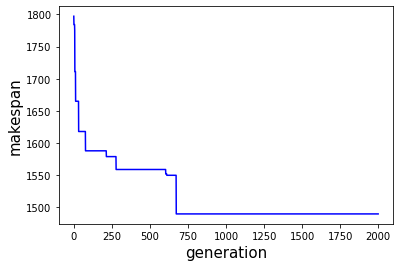

ImportError: ignored

In [ ]:
GenALg('ft20',dict_instance)